In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [841]:
df=pd.read_csv('./datasets/원본data.csv',index_col=0)
df

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,외환보유액,뉴스심리지수,원달러,...,CD,유가,G20,미장단기,거래량,구리,천연가스,은,금,종가
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.000000,112.100000,98.500000,10384.800000,105.100000,1853.700000,0.670000,261870733.000000,98.540000,936.800000,...,5.840000,26.816444,101.558900,1.030000,11548.000000,3.064000,7.850000,15.290000,860.000000,1000.000000
2008-02,3.900000,112.000000,98.400000,9246.100000,103.700000,1775.300000,0.530000,262364808.000000,97.880000,944.100000,...,5.460000,26.276930,101.286800,1.530000,13564.000000,3.273000,7.740000,16.916000,913.500000,897.970000
2008-03,3.200000,110.500000,98.400000,9434.400000,102.200000,1691.000000,0.310000,264245660.000000,88.120000,946.700000,...,5.170000,26.771666,100.974300,1.930000,9948.000000,3.928500,9.346000,20.180000,984.200000,873.820000
2008-04,0.400000,109.400000,98.900000,10121.700000,100.700000,1705.800000,0.140000,260482546.000000,103.730000,983.500000,...,5.390000,27.311699,100.601400,1.770000,13964.000000,3.806500,9.724000,16.935000,887.800000,965.780000
2008-05,-1.600000,106.100000,98.500000,9955.600000,98.600000,1758.200000,0.220000,258198958.000000,93.060000,1009.100000,...,5.360000,25.481760,100.145200,1.410000,16690.000000,3.694500,10.561000,16.205000,850.900000,1056.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.400000,92.700000,115.400000,10568.500000,85.200000,2336.400000,0.840000,423163664.000000,83.390000,1304.210000,...,4.030000,76.773430,98.935240,-0.720000,8411.000000,3.817500,6.738000,22.841000,1815.200000,1435.740000
2023-01,-15.400000,90.900000,111.200000,13969.700000,85.100000,2380.400000,0.450000,429967671.000000,93.790000,1269.020000,...,3.980000,78.254589,98.971380,-0.610000,10487.000000,3.795250,4.273500,24.328000,1835.800000,1343.910000
2023-02,-16.200000,91.100000,106.900000,14725.600000,84.600000,2391.300000,0.180000,425286150.000000,97.480000,1221.780000,...,3.590000,74.513809,99.024580,-0.700000,9732.000000,4.111000,2.468000,23.609000,1927.800000,1439.490000


In [842]:
statics=df.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).T.round(2)
statics['Var']= statics['std']**2
statics['coeff']=statics['std']/statics['mean']
statics

,min,mean,std,median,max,Var,coeff
재고순환지표,-24.900000,-2.880000,8.440000,-4.500000,31.300000,71.233600,-2.930556
경제심리지수,64.300000,98.220000,9.710000,97.750000,115.900000,94.284100,0.098860
기계류내수출,85.300000,104.080000,7.550000,102.150000,119.600000,57.002500,0.072540
건설수주액,5352.400000,10623.160000,3235.480000,10493.050000,17969.600000,10468330.830400,0.304569
수출입물가비율,83.600000,93.970000,6.470000,94.250000,107.600000,41.860900,0.068852
코스피,1115.100000,2083.170000,411.050000,2011.250000,3232.100000,168962.102500,0.197319
장단기,-0.250000,0.800000,0.760000,0.640000,2.900000,0.577600,0.950000
외환보유액,200505915.000000,355816400.170000,66415471.300000,368288515.500000,469207742.000000,4411014828001123.500000,0.186657
뉴스심리지수,60.040000,99.450000,10.370000,100.780000,119.420000,107.536900,0.104274
원달러,936.800000,1147.400000,88.070000,1128.380000,1570.200000,7756.324900,0.076756


In [843]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', '원위안', 'CD', '유가', 'G20', '미장단기', '거래량', '구리',
       '천연가스', '은', '금', '종가'],
      dtype='object')

In [844]:
## 경제심리지수, 기계류내수출, 장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스, 수출입내물가비율--> 정상적이다
df['재고순환지표']+= 24.9
df['재고순환지표']=np.log1p(df['재고순환지표'])
df['거래량']=np.log1p(df['거래량'])
df['코스피']=np.log1p(df['코스피'])

# # df['천연가스']=np.log1p(df['천연가스'])

df['기계류내수출'] -=100
df['수출입물가비율'] -=100

df['은']=df['은'].diff(1)
df['금']=df['금'].diff(1)
df['구리']=df['구리'].diff(1)
df['미장단기']=df['미장단기'].diff(1)
df['유가']=df['유가'].diff(1)
df['원엔']=df['원엔'].diff(1)
df['건설수주액']=df['건설수주액'].diff(1)

df['종가']=df['종가'].pct_change()

df=df.dropna(axis=0)

In [845]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터프레임으로부터 독립변수들을 선택하여 X에 저장
X = df[['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', '원위안', '유가', 'G20', '미장단기', '거래량', '구리',
       '천연가스', '은', '금', '종가' ]]

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)


    Feature   VIF Factor
0     const 19051.599570
1    재고순환지표     2.160830
2    경제심리지수     4.490854
3    기계류내수출     1.860782
4     건설수주액     1.075342
5   수출입물가비율     1.949968
6       장단기     4.018895
7     외환보유액     2.298980
8    뉴스심리지수     3.629100
9       원달러     6.171194
10       원엔     1.690056
11      원위안     4.704925
12       유가     1.184077
13      G20     4.427880
14     미장단기     1.338060
15      거래량     2.131617
16       구리     1.715862
17     천연가스     2.166017
18        은     3.271563
19        금     3.232779
20       종가     1.585433


<Axes: xlabel='Date'>

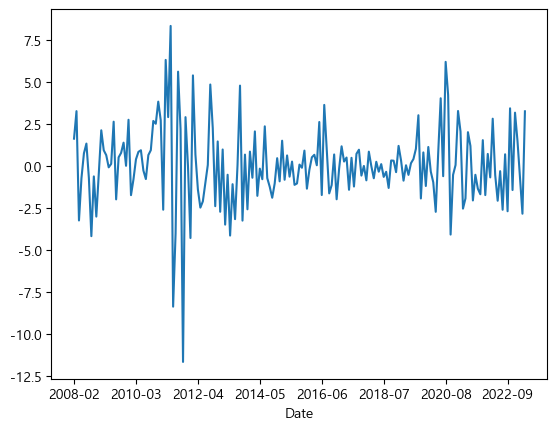

In [846]:
df['은'].plot()

In [847]:
### H0가 비정상(non-stationary)이다
### 유의수준보다 p-value가 작으면 기각 --> 정상적 데이터다


from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표,-4.223353,0.000601,4.000000,178.000000,-2.877918
경제심리지수,-3.325043,0.013795,11.000000,171.000000,-2.878595
기계류내수출,-3.823751,0.002673,11.000000,171.000000,-2.878595
건설수주액,-3.362024,0.012324,12.000000,170.000000,-2.878696
수출입물가비율,-3.070182,0.028840,13.000000,169.000000,-2.878799
코스피,-2.901091,0.045221,13.000000,169.000000,-2.878799
장단기,-3.516219,0.007580,13.000000,169.000000,-2.878799
외환보유액,-2.878236,0.047938,11.000000,171.000000,-2.878595
뉴스심리지수,-5.616294,0.000001,12.000000,170.000000,-2.878696
원달러,-3.601805,0.005727,0.000000,182.000000,-2.877555


In [848]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df)             ## X_train을 endogenous 변수로 설정한 후
res = model_var.select_order(6)            ## select_order 메서드를 호출하여 최적의 차수를 선택, select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정
res.summary()



,AIC,BIC,FPE,HQIC
0,59.03,59.42,4.316e+25,59.19
1,26.50,35.58*,3.343e+11,30.19
2,24.20,41.97,4.159e+10,31.41
3,22.89,49.34,2.092e+10,33.62
4,20.35,55.48,6.283e+09,34.60
5,16.12,59.94,1.247e+09,33.90
6,8.299*,60.80,7.932e+07*,29.59*


In [849]:
model_fit = model_var.fit(maxlags=6, ic='aic')         ## maxlags 매개변수를 통해 모델의 최대 시차(lag)를 설정하고,
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Jun, 2023
Time:                     19:03:51
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                    60.8039
Nobs:                     177.000    HQIC:                   29.5928
Log likelihood:          -3333.79    FPE:                7.93232e+07
AIC:                      8.29877    Det(Omega_mle):         350.635
--------------------------------------------------------------------
Results for equation 재고순환지표
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              2.897724         5.855601            0.495           0.621
L1.재고순환지표          1.086239         0.149904            7.246           0.000
L1.경제심리지수          0.022514         0.020712            1.087          

In [850]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', '원위안', 'CD', '유가', 'G20', '미장단기', '거래량', '구리',
       '천연가스', '은', '금', '종가'],
      dtype='object')

In [851]:
train=df.iloc[:167][['재고순환지표','건설수주액','수출입물가비율','원달러','원엔','유가','G20','거래량','은','종가']]
test=df.iloc[167:][['재고순환지표','건설수주액','수출입물가비율','원달러','원엔','유가','G20','거래량','은','종가']]

In [852]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=train)             ## X_train을 endogenous 변수로 설정한 후
res = model_var.select_order(6)            ## select_order 메서드를 호출하여 최적의 차수를 선택, select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정
res.summary()

,AIC,BIC,FPE,HQIC
0,18.64,18.83,1.247e+08,18.72
1,9.225,11.33*,1.017e+04,10.08
2,8.336,12.36,4235.,9.968
3,7.537*,13.47,1970.*,9.946*
4,7.706,15.55,2492.,10.89
5,7.879,17.64,3309.,11.84
6,7.999,19.67,4432.,12.74


In [853]:
from statsmodels.stats.stattools import durbin_watson

durbin_res = pd.DataFrame([df.columns, 
                           [round(x,2) for x in durbin_watson(df)]]).T
durbin_res.set_index([0])

,1
0,
재고순환지표,0.010000
경제심리지수,0.000000
기계류내수출,0.050000
건설수주액,1.940000
수출입물가비율,0.010000
코스피,0.000000
장단기,0.010000
외환보유액,0.000000
뉴스심리지수,0.000000


In [854]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Assuming X_train is a pandas DataFrame containing your training data

# Fit VAR model
model_var = VAR(endog=train)
model_fit = model_var.fit(maxlags=3, ic='aic')


In [855]:
pred = model_fit.forecast(train.values[-3:], steps=4)
pred

array([[ 2.79156660e+00, -9.80939378e+02, -1.06682189e+01,
         1.20326762e+03,  2.28607382e-01,  6.29934869e-01,
         1.00026911e+02,  9.22251140e+00,  5.53005107e-01,
        -2.19693882e-02],
       [ 2.87163615e+00,  9.00917613e+01, -1.06987372e+01,
         1.17968582e+03, -1.47294971e-01, -4.69626377e-01,
         9.95795672e+01,  9.37700402e+00,  1.15667743e+00,
         3.28209967e-02],
       [ 3.04308264e+00, -3.50344439e+02, -1.07895936e+01,
         1.17882046e+03, -7.86509464e-02,  3.34686771e-01,
         9.92084598e+01,  9.43552893e+00,  3.88966446e-02,
         8.01579764e-03],
       [ 3.11231349e+00,  4.87102680e+02, -1.10531261e+01,
         1.17380413e+03, -6.11101458e-02,  5.86780900e-01,
         9.91057895e+01,  9.37551442e+00,  2.04666689e-01,
         4.94741607e-03]])

In [856]:
pred = model_fit.forecast(train.values[-4:], steps=16)
pred = pd.DataFrame(pred, index=test.index, columns=test.columns + '_pred')
pred



,재고순환지표_pred,건설수주액_pred,수출입물가비율_pred,원달러_pred,원엔_pred,유가_pred,G20_pred,거래량_pred,은_pred,종가_pred
Date,,,,,,,,,,
2022-01,2.791567,-980.939378,-10.668219,1203.267616,0.228607,0.629935,100.026911,9.222511,0.553005,-0.021969
2022-02,2.871636,90.091761,-10.698737,1179.685819,-0.147295,-0.469626,99.579567,9.377004,1.156677,0.032821
2022-03,3.043083,-350.344439,-10.789594,1178.820463,-0.078651,0.334687,99.208460,9.435529,0.038897,0.008016
2022-04,3.112313,487.102680,-11.053126,1173.804131,-0.061110,0.586781,99.105789,9.375514,0.204667,0.004947
2022-05,3.148589,-152.138348,-11.255829,1147.778084,-0.337970,1.229141,99.018449,9.466256,0.268918,0.029162
2022-06,3.203684,221.111388,-11.362247,1140.996649,-0.034139,0.585952,99.009104,9.495877,0.301775,0.014699
2022-07,3.175564,-272.355691,-11.411288,1140.337559,-0.086532,0.762555,99.092910,9.466866,0.013969,0.007857
2022-08,3.157450,195.151902,-11.327917,1133.233558,-0.053538,0.714591,99.219712,9.483052,0.020057,0.013270
2022-09,3.121220,-30.515308,-11.227404,1132.772208,-0.062405,0.803334,99.396074,9.454785,0.062018,0.007126


In [857]:
pred['종가_pred']

Date
2022-01   -0.021969
2022-02    0.032821
2022-03    0.008016
2022-04    0.004947
2022-05    0.029162
2022-06    0.014699
2022-07    0.007857
2022-08    0.013270
2022-09    0.007126
2022-10    0.007566
2022-11    0.010541
2022-12    0.009365
2023-01    0.008481
2023-02    0.007226
2023-03    0.006038
2023-04    0.005127
Name: 종가_pred, dtype: float64

In [858]:
test['종가']

Date
2022-01    0.060199
2022-02   -0.079602
2022-03   -0.040206
2022-04    0.015971
2022-05    0.030698
2022-06    0.006262
2022-07   -0.086436
2022-08    0.065730
2022-09   -0.015726
2022-10   -0.076629
2022-11   -0.028279
2022-12    0.030911
2023-01   -0.063960
2023-02    0.071121
2023-03    0.034130
2023-04   -0.000645
Name: 종가, dtype: float64

In [859]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate forecast bias
forecast_errors = [test['종가'][i]- pred['종가_pred'][i] for i in range(len(test['종가']))]
bias = sum(forecast_errors) * 1.0/len(test['종가'])
print('Bias: %f' % bias)

#Calculate mean absolute error
mae = mean_absolute_error(test['종가'],pred['종가_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(test['종가'], pred['종가_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -0.014171
MAE: 0.046761
MSE: 0.003331
RMSE: 0.057711
